# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


In [4]:
df_diabetes = pd.read_csv('diabetes.csv')
print(df_diabetes.head())

   Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0   26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1   40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2   40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3   43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4   36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   

    CCR  FFPG  smoking  drinking  family_histroy  Diabetes  
0  63.8  5.40      3.0       3.0               0         0  
1  70.3  4.10      1.0       1.0               0         0  
2  61.1  4.85      3.0       3.0               0         0  
3  73.4  5.30      2.0       3.0               0         0  
4  67.5  5.53      3.0       3.0               0         0  


In [5]:
df_diabetes = pd.read_csv('diabetes.csv')
X = df_diabetes.drop('Diabetes', axis=1)
y = df_diabetes['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy: 0.9535423925667829


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


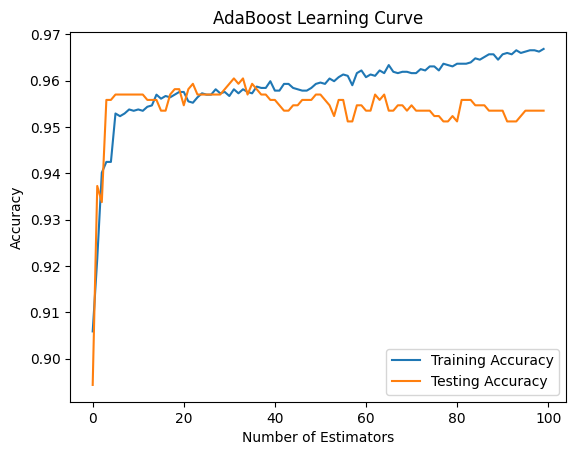

In [6]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=1)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost accuracy: {ada_accuracy}')

ada_train_accuracies = []
ada_test_accuracies = []

for y_train_pred, y_test_pred in zip(ada_model.staged_predict(X_train), ada_model.staged_predict(X_test)):
    ada_train_accuracies.append(accuracy_score(y_train, y_train_pred))
    ada_test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.plot(ada_train_accuracies, label="Training Accuracy")
plt.plot(ada_test_accuracies, label="Testing Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Learning Curve')
plt.legend()
plt.show()


Gradient Boosting accuracy: 0.9605110336817654


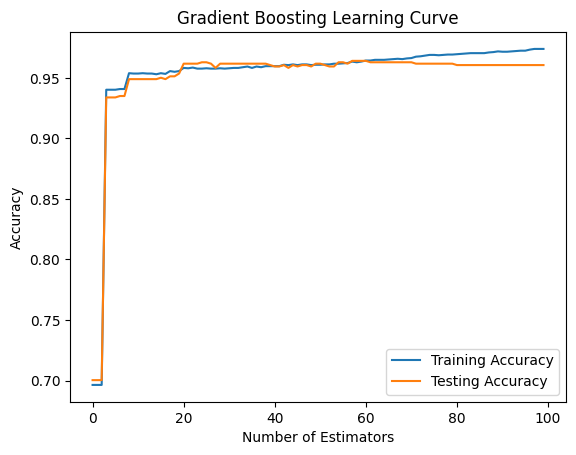

In [37]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting accuracy: {gb_accuracy}')

gb_train_accuracies = []
gb_test_accuracies = []

for y_train_pred, y_test_pred in zip(gb_model.staged_predict(X_train), gb_model.staged_predict(X_test)):
    gb_train_accuracies.append(accuracy_score(y_train, y_train_pred))
    gb_test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.plot(gb_train_accuracies, label="Training Accuracy")
plt.plot(gb_test_accuracies, label="Testing Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Learning Curve')
plt.legend()
plt.show()


XGBoost accuracy: 0.9558652729384437


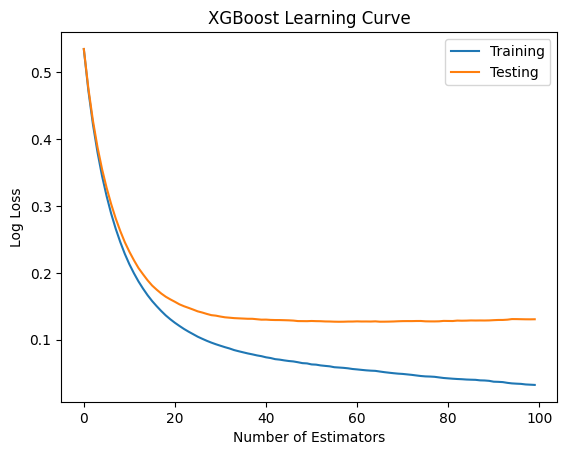

In [38]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=1, eval_metric='logloss')

eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost accuracy: {xgb_accuracy}')

results = xgb_model.evals_result()

epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.plot(x_axis, results['validation_0']['logloss'], label='Training')
plt.plot(x_axis, results['validation_1']['logloss'], label='Testing')
plt.xlabel('Number of Estimators')
plt.ylabel('Log Loss')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()


In [11]:
base_estimator = DecisionTreeClassifier(max_depth=1)

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

ada_model = AdaBoostClassifier(estimator=base_estimator, random_state=1)

grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=5, scoring='accuracy')

grid_search_ada.fit(X_train, y_train)

print(f'Best param for AdaBoost: {grid_search_ada.best_params_}')
print(f'Best accuracy for AdaBoost: {grid_search_ada.best_score_}')


param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingClassifier(random_state=1)

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy')

grid_search_gb.fit(X_train, y_train)

print(f'Best param for Gradient Boosting: {grid_search_gb.best_params_}')
print(f'Best accuracy for Gradient Boosting: {grid_search_gb.best_score_}')





param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=1)

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

grid_search_xgb.fit(X_train, y_train)
print(f'Best param for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best accuracy for XGBoost: {grid_search_xgb.best_score_}')


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

Best param for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 150}
Best accuracy for AdaBoost: 0.9511910588314713
Best param for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best accuracy for Gradient Boosting: 0.9517749856549769
Best param for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best accuracy for XGBoost: 0.9543870456002971


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

print(f'Best accuracy for Gradient Boosting: {grid_search_gb.best_score_}')
gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=1
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting acuraccy: {gb_accuracy}')


Best accuracy for Gradient Boosting: 0.9517749856549769
Gradient Boosting acuraccy: 0.9605110336817654


In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

print(f'Best accuracy for XGBoost: {grid_search_xgb.best_score_}')
xgb_model = xgb.XGBClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=3,
    subsample=0.6,
    alpha=0.7,
    reg_lambda=1.5,
    random_state=1
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost acuraccy: {xgb_accuracy}')


Best accuracy for XGBoost: 0.9543870456002971
XGBoost acuraccy: 0.9663182346109176


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=150, 
    learning_rate=0.1, 
    random_state=1
)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=1
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

xgb_model = xgb.XGBClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=3,
    subsample=0.6,
    alpha=0.7,
    reg_lambda=1.5,
    random_state=1
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")

evaluate_model(y_test, y_pred_ada, "AdaBoost")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy: 0.9501
Precision: 0.9694
Recall: 0.8605
F1-Score: 0.9117


Gradient Boosting
Accuracy: 0.9605
Precision: 0.9667
Recall: 0.8992
F1-Score: 0.9317


XGBoost
Accuracy: 0.9663
Precision: 0.9831
Recall: 0.9031
F1-Score: 0.9414




В мому випадку регуляризація впливає на всі моделі позитивно але суттєвої різниці в даному випадку нема. В цілому можна сказати що регуляризація покращує результат але вона може і погіршити у випадку якщо зарегуляризувати модель надто сильно або фіч в датасеті небагато.

Найкраще впоралась модель регуляризована XGBoost яка показала 96,6% точності і 98% повноти (що для даного випадку важливіше ніж загальна точність). Для ще кращого результату можна знайти ще оптимальніші параметри.